In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv("/content/Netflix Dataset (1).csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      7789 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7789 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


Data Cleaning & Preparation

In [ ]:
df.duplicated().value_counts()

,count
False,7787
True,2


In [ ]:
print(df.isnull().sum())

# Fill missing values
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)

Show_Id           0
Category          0
Title             0
Director          0
Cast            718
Country           0
Release_Date     10
Rating            7
Duration          0
Type              0
Description       0
dtype: int64


MOVIES VS TV

In [ ]:
df.dtypes

,0
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,object
Rating,object
Duration,object
Type,object


/tmp/ipython-input-3396531683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='coolwarm')


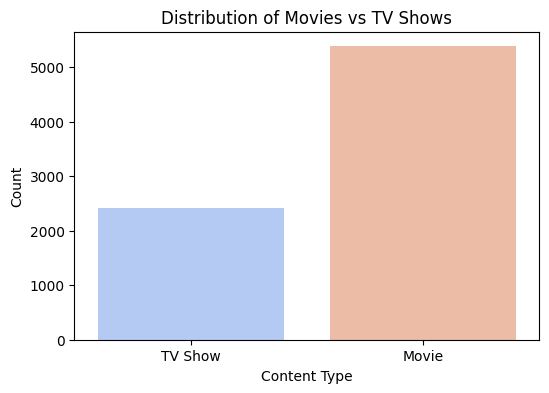

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='coolwarm')
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

 Top 10 Countries

In [ ]:
top_10_countries = df['Country'].value_counts().head(10).to_frame()
top_10_countries

,count
Country,
United States,2556
India,923
Unknown,507
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115


/tmp/ipython-input-360185905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


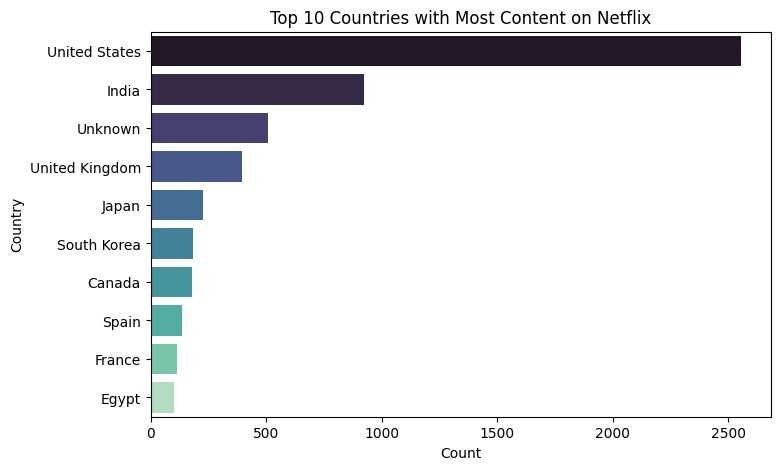

In [ ]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

Content Added Over the Years

In [ ]:
df.describe()

,Release_Date,year_added
count,7691,7691.000000
mean,2019-01-07 22:53:43.195943424,2018.507476
min,2008-01-01 00:00:00,2008.000000
25%,2018-02-07 00:00:00,2018.000000
50%,2019-03-15 00:00:00,2019.000000
75%,2020-01-25 12:00:00,2020.000000
max,2021-01-16 00:00:00,2021.000000
std,NaN,1.382141


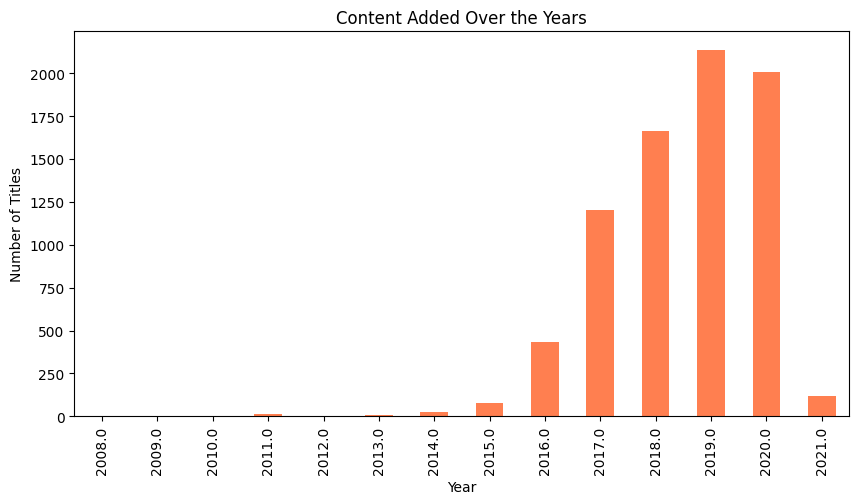

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['Release_Date'].dt.year

content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
content_by_year.plot(kind='bar', color='coral')
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

Ratings Distribution

In [ ]:
rating_distribution = df['Rating'].value_counts().to_frame()
rating_distribution

,count
Rating,
TV-MA,2865
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194


/tmp/ipython-input-1209140298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_movies, x='Rating', y='duration_num', palette='cool')


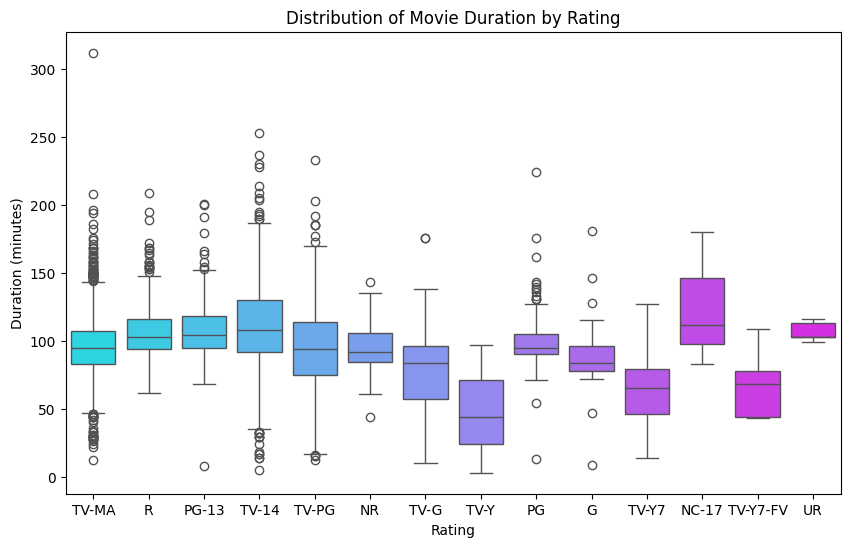

In [ ]:
df_movies = df[df['Category'] == 'Movie'].copy()
df_movies['duration_num'] = df_movies['Duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_movies, x='Rating', y='duration_num', palette='cool')
plt.title("Distribution of Movie Duration by Rating")
plt.xlabel("Rating")
plt.ylabel("Duration (minutes)")
plt.show()

Most Popular Genres

In [ ]:
hood_group = df["Type"].value_counts().to_frame()
hood_group

,count
Type,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
"Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy",1
"Docuseries, Science & Nature TV, TV Action & Adventure",1
"British TV Shows, Classic & Cult TV, Kids' TV",1


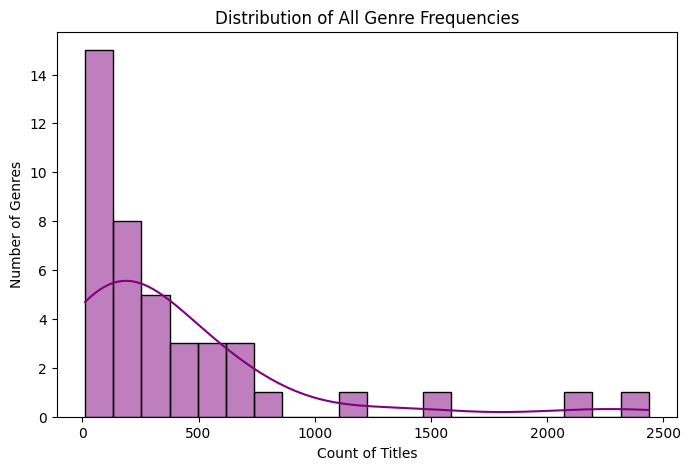

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(genres.value_counts(), bins=20, color='purple', kde=True)
plt.title("Distribution of All Genre Frequencies")
plt.xlabel("Count of Titles")
plt.ylabel("Number of Genres")
plt.show()


CONCLUSION

This project successfully addressed the problem of 'Content Trends Analysis for Strategic Recommendations' by systematically analyzing the evolution of Netflix’s content catalog. By focusing on the distribution of Movies vs. TV Shows, the shifting landscape of genres, and country-wise contributions, the analysis achieved its objectives of uncovering key content dynamics over the period from 2008 to 2021.
